# Study the ratio of calibrated spectra 
==================================================================================================

- author : Sylvie Dagoret-Campagne
- affiliation : LAL/IN2P3/CNRS FRANCE
- creation date   : 18th October 2017
- update : October 20th 2017
- Version 1.0




In [2]:
%%javascript
var kernel = IPython.notebook.kernel;
var thename = window.document.getElementById("notebook_name").innerHTML;
var command = "theNotebook = " + "'"+thename+"'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

print theNotebook
from IPython.display import Image, display
import sys
sys.path.append("../../common_tools/")
from common_notebook import *

init_notebook()

AnaCalibratedandSimSpectraRatio
ccdproc version 1.2.0
bottleneck version 1.2.1
/Users/dagoret/MacOSX/GitHub/LSST/CTIOAnaJun2017/CTIOAnaJun2017/ana_05jun17/HD205905


In [4]:
%config InlineBackend.rc = {}
matplotlib.rc_file("../../templates/matplotlibrc")

/Users/dagoret/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:913: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [5]:
matplotlib.rcParams.update({'font.size': 16})
matplotlib.rcParams.update({'font.size': 16})
matplotlib.rcParams.update({'figure.figsize' : (10, 5)})

### PySynphot

In [6]:
os.environ['PYSYN_CDBS']

'/Users/dagoret/MacOSX/External/PySynPhotData/grp/hst/cdbs'

In [7]:
import pysynphot as S

# Initialisation

## Steering 

In [8]:
ShowInputSpectra=False

## Input fits file

- containing the calibrated spectra

In [9]:
inputdir="./simandcalibspec"
MIN_IMGNUMBER=46
MAX_IMGNUMBER=126
date="20170605"
object_name='HD205905'
tag = "calibandSimSpectra"
SelectTagRe='^%s_%s_([0-9]+).fits$' % (tag,date) # regular expression to select the file
SearchTagRe='^%s_%s_[0-9]+.fits$' % (tag,date)
NBIMGPERROW=2

## Output directory

In [10]:
dir_top_images="images_notebooks/"+theNotebook ### Top directory to save images
ensure_dir(dir_top_images) # create that directory

outputdir="./study_calibandsimspec"
ensure_dir(outputdir)

# Open input file

In [11]:
sorted_numbers,sorted_files = MakeFileList([inputdir],MIN_IMGNUMBER,MAX_IMGNUMBER,SelectTagRe,SearchTagRe)

In [12]:

#all_dates,all_airmass,all_titles,all_header,all_expo, all_leftspectra_data,all_rightspectra_data, all_leftspectra_data_stat_err , all_rightspectra_data_stat_err ,all_leftspectra_wl,all_rightspectra_wl,all_filt,all_filt1,all_filt2=BuildCalibSpec(sorted_files,sorted_numbers,object_name)

In [13]:
all_headers, \
all_dates, \
all_objects, \
all_airmass, \
all_titles, \
all_exposures, \
all_ut, all_ra,all_dec,all_epoch,all_zenith,all_ha,all_st,all_alt,all_focus,\
all_temp, all_press,all_hum,all_windsp,\
all_seeing,all_seeingam,\
all_filt,all_filt1,all_filt2,\
all_leftspectra_data, \
all_rightspectra_data, \
all_leftspectra_data_stat_err ,\
all_rightspectra_data_stat_err ,\
all_leftspectra_wl,\
all_rightspectra_wl, \
all_totleftspectra_data, \
all_totrightspectra_data, \
all_sim_spectra_wl, \
all_sim_spectra_data=BuildCalibandSimSpecFull(sorted_files,sorted_numbers)

# Airmasses

In [14]:
all_airmass=np.array(all_airmass)

/Users/dagoret/anaconda/lib/python2.7/site-packages/matplotlib/cbook.py:2649: UserWarning: Saw kwargs [u'lw', u'linewidth'] which are all aliases for u'linewidth'.  Kept value from u'linewidth'
  seen=seen, canon=canonical, used=seen[-1]))


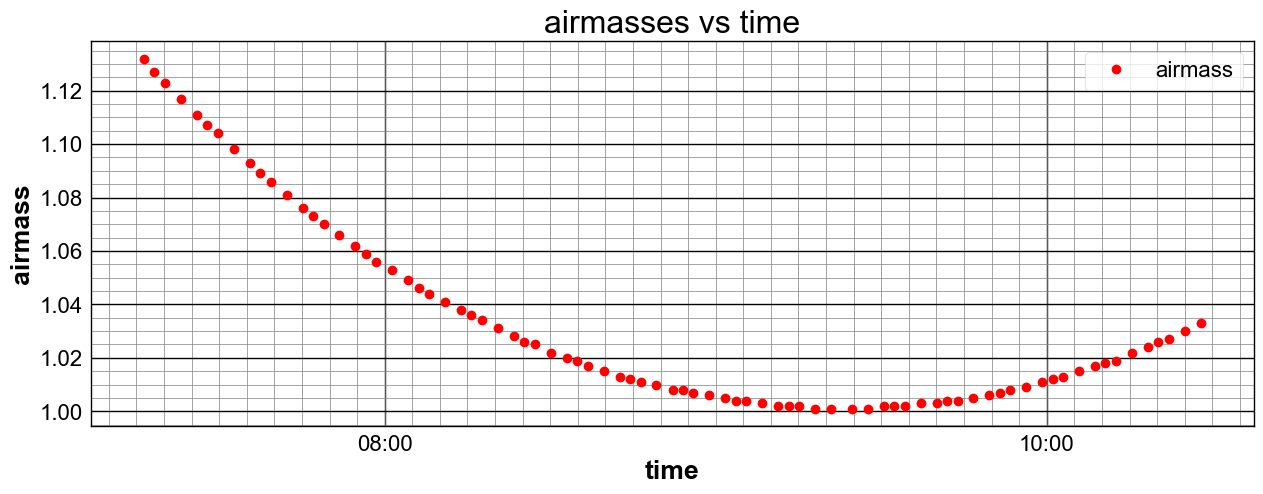

In [15]:
PlotDataVsDateTime(all_dates,all_airmass,"airmasses vs time","time","airmass",dir_top_images,'airmass_vs_time.pdf')

# Disperser Sorting

In [26]:
filt0_idx,filt1_idx,filt2_idx,filt3_idx,filt4_idx,filt5_idx,filt6_idx=get_filt_idx(all_filt)

In [27]:
print  Filt_names[0],' \t : filt0_idx :: ',filt0_idx
print  Filt_names[1],' \t : filt1_idx :: ',filt1_idx
print  Filt_names[2],' \t : filt2_idx :: ',filt2_idx
print  Filt_names[3],' \t : filt3_idx :: ',filt3_idx
print  Filt_names[4],' \t : filt4_idx :: ',filt4_idx
print  Filt_names[5],' \t : filt5_idx :: ',filt5_idx
print  Filt_names[6],' \t : filt6_idx :: ',filt6_idx

dia Ron400  	 : filt0_idx ::  []
dia Thor300  	 : filt1_idx ::  [ 0  4  8 12 16 20 24 28 32 36 40 44 48 52 55 59 63 67 71 75 79]
dia HoloPhP  	 : filt2_idx ::  [ 1  5  9 13 17 21 25 29 33 37 41 45 49 56 60 64 68 72 76]
dia HoloPhAg  	 : filt3_idx ::  [ 2  6 10 14 18 22 26 30 34 38 42 46 50 53 57 61 65 69 73 77]
dia HoloAmAg  	 : filt4_idx ::  [ 3  7 11 15 19 23 27 31 35 39 43 47 51 54 58 62 66 70 74 78]
dia Ron200  	 : filt5_idx ::  []
Unknown  	 : filt6_idx ::  []


In [28]:
Thor300_index=np.array(filt1_idx)
Ron400_index=np.array(filt0_idx)
HoloPhP_index=np.array(filt2_idx)
HoloPhAg_index=np.array(filt3_idx)
HoloAmAg_index=np.array(filt4_idx)
Ron200_index=np.array(filt5_idx)

In [29]:
all_filt1=np.array(all_filt1)
all_filt2=np.array(all_filt2)

In [30]:
def FindIndexWithFilt(all_filt,in_index,tagfilt):
    all_filt_indisp=all_filt[in_index]
    sel_idx=np.where(all_filt_indisp==tagfilt)
    out_index=in_index[sel_idx]
    return out_index

In [31]:
all_filt1_Thor300=all_filt1[Thor300_index]
#all_filt1_Ron400=all_filt1[Ron400_index]
all_filt1_HoloPhP=all_filt1[HoloPhP_index]
all_filt1_HoloPhAg=all_filt1[HoloPhAg_index]
all_filt1_HoloAmAg=all_filt1[HoloAmAg_index]
#all_filt1_Ron200=all_filt1[Ron200_index]

In [32]:
Thor300_index2=FindIndexWithFilt(all_filt1,Thor300_index,'dia')
#Ron400_index2=FindIndexWithFilt(all_filt1,Ron400_index,'dia')
HoloPhP_index2=FindIndexWithFilt(all_filt1,HoloPhP_index,'dia')
HoloPhAg_index2=FindIndexWithFilt(all_filt1,HoloPhAg_index,'dia')
HoloAmAg_index2=FindIndexWithFilt(all_filt1,HoloAmAg_index,'dia')
#Ron200_index2=FindIndexWithFilt(all_filt1,Ron200_index,'FGB37')

# Class airmass according dispersers and find where is min for each

In [33]:
all_am_Sim=all_airmass
all_am_Thor300=all_airmass[Thor300_index2]
#all_am_Ron400=all_airmass[Ron400_index2]
all_am_HoloPhP=all_airmass[HoloPhP_index2]
all_am_HoloPhAg=all_airmass[HoloPhAg_index2]
all_am_HoloAmAg=all_airmass[HoloAmAg_index2]

In [34]:
min_am_Sim_idx=np.where(all_am_Sim==all_am_Sim.min())[0][0]
min_am_Thor300_idx=np.where(all_am_Thor300==all_am_Thor300.min())[0][0]
#min_am_Ron400_idx=np.where(all_am_Ron400==all_am_Ron400.min())[0][0]
min_am_HoloPhP_idx=np.where(all_am_HoloPhP==all_am_HoloPhP.min())[0][0]
min_am_HoloPhAg_idx=np.where(all_am_HoloPhAg==all_am_HoloPhAg.min())[0][0]
min_am_HoloAmAg_idx=np.where(all_am_HoloAmAg==all_am_HoloAmAg.min())[0][0]

# Clean spectra from trailing zeros

trailing zero induce PySynphot failing

In [35]:
all_sim_spectra_wl_cut,all_sim_spectra_data_cut=RemoveBadWavelengths(all_sim_spectra_wl,all_sim_spectra_data)
all_leftspectra_wl_cut,all_leftspectra_data_cut=RemoveBadWavelengths(all_leftspectra_wl,all_leftspectra_data)
all_rightspectra_wl_cut,all_rightspectra_data_cut=RemoveBadWavelengths(all_rightspectra_wl,all_rightspectra_data)

all_leftspectra_wl_cut,all_totleftspectra_data_cut=RemoveBadWavelengths(all_leftspectra_wl,all_totleftspectra_data)
all_rightspectra_wl_cut,all_totrightspectra_data_cut=RemoveBadWavelengths(all_rightspectra_wl,all_totrightspectra_data)

all_leftspectra_wl_cut,all_leftspectra_data_stat_err_cut=RemoveBadWavelengths(all_leftspectra_wl,all_leftspectra_data_stat_err)
all_rightspectra_wl_cut,all_rightspectra_data_stat_err_cut=RemoveBadWavelengths(all_rightspectra_wl,all_rightspectra_data_stat_err)

In [36]:
all_sim_spectra_wl,all_sim_spectra_data=all_sim_spectra_wl_cut,all_sim_spectra_data_cut
all_rightspectra_wl,all_rightspectra_data=all_rightspectra_wl_cut,all_rightspectra_data_cut
all_leftspectra_wl,all_leftspectra_data=all_leftspectra_wl_cut,all_leftspectra_data_cut
all_totleftspectra_data=all_totleftspectra_data_cut
all_totrightspectra_data=all_totrightspectra_data_cut
all_rightspectra_data_stat_err=all_rightspectra_data_stat_err_cut
all_leftspectra_data_stat_err=all_leftspectra_data_stat_err_cut

# Show Spectra

In [37]:
if ShowInputSpectra:
    ShowCalibSpectrainPDF(all_rightspectra_data,all_rightspectra_data_stat_err,all_rightspectra_wl,all_titles,object_name,dir_top_images,all_filt,date,'calib1Dspectra_right.pdf','order +1')

In [38]:
if ShowInputSpectra:
    ShowCalibSpectrainPDF(all_leftspectra_data,all_leftspectra_data_stat_err,all_leftspectra_wl,all_titles,object_name,dir_top_images,all_filt,date,'calib1Dspectra_left.pdf','order -1')

# Sort the spectra according disperser type

In [40]:
all_wl_Sim,all_spec_Sim=all_sim_spectra_wl,all_sim_spectra_data
all_wl_Thor300,all_spec_Thor300=GetSpectraFromIndexList(all_rightspectra_wl,all_rightspectra_data,Thor300_index2)
#all_wl_Ron400,all_spec_Ron400=GetSpectraFromIndexList(all_rightspectra_wl,all_rightspectra_data,Ron400_index2)
all_wl_HoloPhP,all_spec_HoloPhP=GetSpectraFromIndexList(all_rightspectra_wl,all_rightspectra_data,HoloPhP_index2)
all_wl_HoloPhAg,all_spec_HoloPhAg=GetSpectraFromIndexList(all_rightspectra_wl,all_rightspectra_data,HoloPhAg_index2)
all_wl_HoloAmAg,all_spec_HoloAmAg=GetSpectraFromIndexList(all_rightspectra_wl,all_rightspectra_data,HoloAmAg_index2)

# Compute Ratio


- Use PySynPhot tool to compute the ratio of spectra. So it is avoided to recalculate a common binning in wl, that is ressampling in the same way wavelength because PySynphot has implemented it.

- The inverse of the spectrum of the reference at minimum airmass is taken to be the PassBand of the system and the system.

- we always cut away the first bin because Pysynphot hate wavelength zero

## Defining the references  of spectra classes

In [41]:
bp_Sim=S.ArrayBandpass(all_wl_Sim[min_am_Sim_idx]*10., 1./all_spec_Sim[min_am_Sim_idx], name='ref_Sim')
bp_Thor300 = S.ArrayBandpass(all_wl_Thor300[min_am_Thor300_idx]*10., 1./all_spec_Thor300[min_am_Thor300_idx], name='ref_Thor300')
#bp_Ron400 = S.ArrayBandpass(all_wl_Ron400[min_am_Ron400_idx]*10., 1./all_spec_Ron400[min_am_Ron400_idx], name='ref_Ron400')
bp_HoloPhP = S.ArrayBandpass(all_wl_HoloPhP[min_am_HoloPhP_idx]*10., 1./all_spec_HoloPhP[min_am_HoloPhP_idx], name='ref_HoloPhP')
bp_HoloPhAg = S.ArrayBandpass(all_wl_HoloPhAg[min_am_HoloPhAg_idx]*10., 1./all_spec_HoloPhAg[min_am_HoloPhAg_idx], name='ref_HoloPhAg')
bp_HoloAmAg = S.ArrayBandpass(all_wl_HoloAmAg[min_am_HoloAmAg_idx]*10., 1./all_spec_HoloAmAg[min_am_HoloAmAg_idx], name='ref_HoloAmAg')

## Compute the ratio

In [42]:
def ComputeSpectrumRatio(all_wl,all_spec,pass_b):
    """
    """
    all_ratio=[]
    all_ratio_wl=[]
    
    NBSPEC=len(all_spec)
    for idx in np.arange(0,NBSPEC):
        sp = S.ArraySpectrum(all_wl[idx]*10., all_spec[idx], name='Reference')
        obs=sp*pass_b
        all_ratio.append(obs.flux)
        all_ratio_wl.append(obs.wave/10.)
        
    return all_ratio_wl,all_ratio

In [43]:
def ShowSpectrumRatio(all_wl,all_spec,pass_b,title,dir_top_img,figname,XMIN=350.,XMAX=700.,YMIN=0.7,YMAX=1.1):
    """
    """
    NBSPEC=len(all_spec)
    
    plt.figure(figsize=(10.,6.))
    for idx in np.arange(0,NBSPEC):
        
        sp = S.ArraySpectrum(all_wl[idx]*10., all_spec[idx], name='Reference')
        obs=sp*pass_b
        
        plt.plot(obs.wave/10.,obs.flux)
        
    plt.xlim(XMIN,XMAX)
    plt.ylim(YMIN,YMAX)
    plt.xlabel("$\lambda$ (nm)")
    plt.ylabel("Ratio of spectra")
    plt.title(title)
    
    figfilename=os.path.join(dir_top_img,figname)
    plt.savefig(figfilename)
        

In [44]:
def ShowSpectrumRatiovsAirmass(all_wl,all_ratio,all_am,wlmin,wlmax,title,dir_top_img,figname,XMIN=350.,XMAX=700.,YMIN=0.7,YMAX=1.1):
    """
    
    """
    NBSPEC=len(all_ratio)
    all_ratio_av= []
    
    for idx in np.arange(NBSPEC):
        thewl=all_wl[idx]
        theratio=np.array(all_ratio[idx])
        
        theindex_sel=np.where(np.logical_and(thewl>=wlmin,thewl<=wlmax))[0]
        theratio_sel=theratio[theindex_sel]
        theratio_av=np.median(theratio_sel)
        all_ratio_av.append(theratio_av)

        
    plt.plot(all_am,all_ratio_av,'bo-')  
    plt.xlabel("Airmass")
    plt.ylabel("Ratio of spectra")
    plt.title(title)
    
    
    figfilename=os.path.join(dir_top_img,figname)
    plt.savefig(figfilename)

## Ratio for simulation

### Ratio for Simulation

In [45]:
Sim_ratio_wl,Sim_ratio=ComputeSpectrumRatio(all_wl_Sim,all_spec_Sim,bp_Sim)

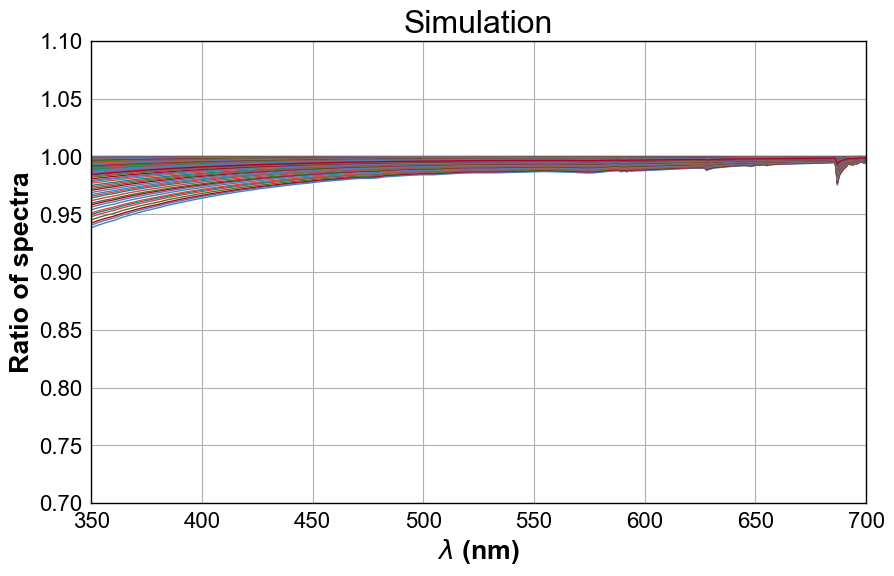

In [47]:
ShowSpectrumRatio(all_wl_Sim,all_spec_Sim,bp_Sim,'Simulation',dir_top_images,'Sim_ratio.pdf');

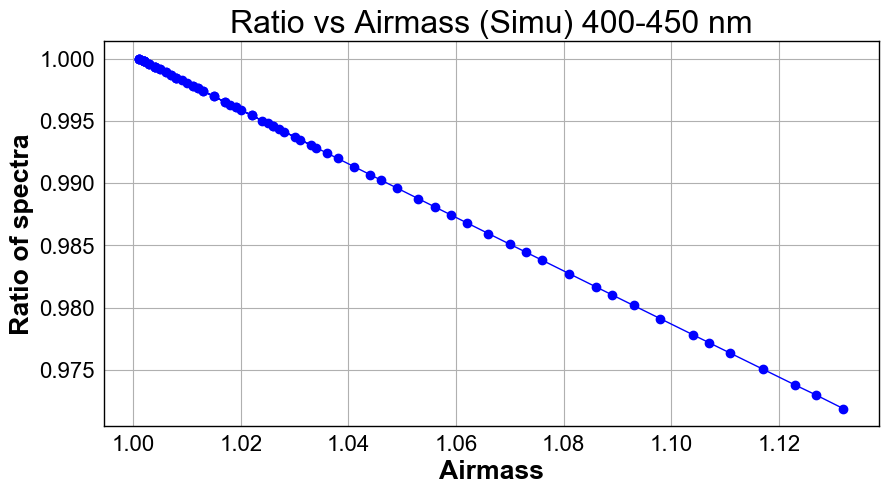

In [48]:
ShowSpectrumRatiovsAirmass(Sim_ratio_wl,Sim_ratio,all_am_Sim,400.,450,'Ratio vs Airmass (Simu) 400-450 nm',dir_top_images,'Sim_ratio_vs_Airmass.pdf')

### Ratio For Thorlab

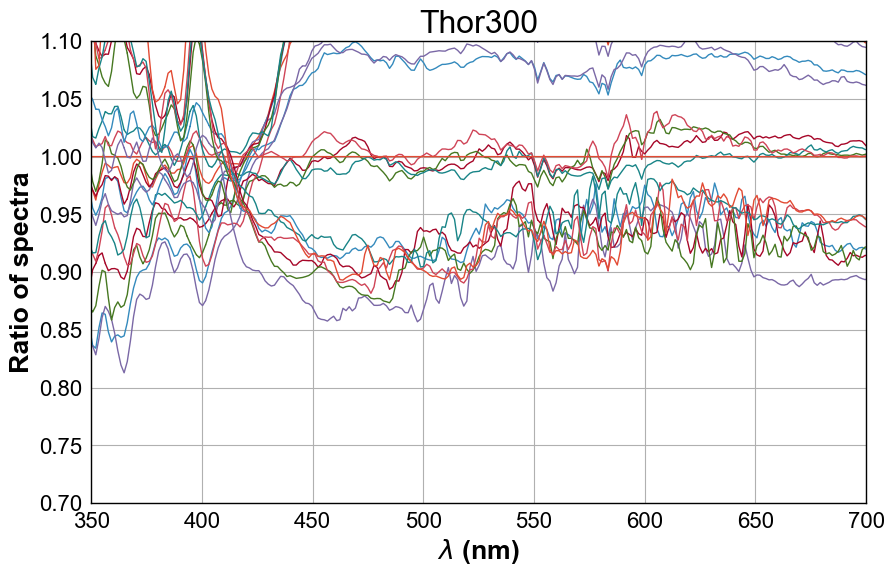

In [49]:
ShowSpectrumRatio(all_wl_Thor300,all_spec_Thor300,bp_Thor300,'Thor300',dir_top_images,'Thor300_ratio.pdf');

In [50]:
Thor300_ratio_wl,Thor300_ratio=ComputeSpectrumRatio(all_wl_Thor300,all_spec_Thor300,bp_Thor300)

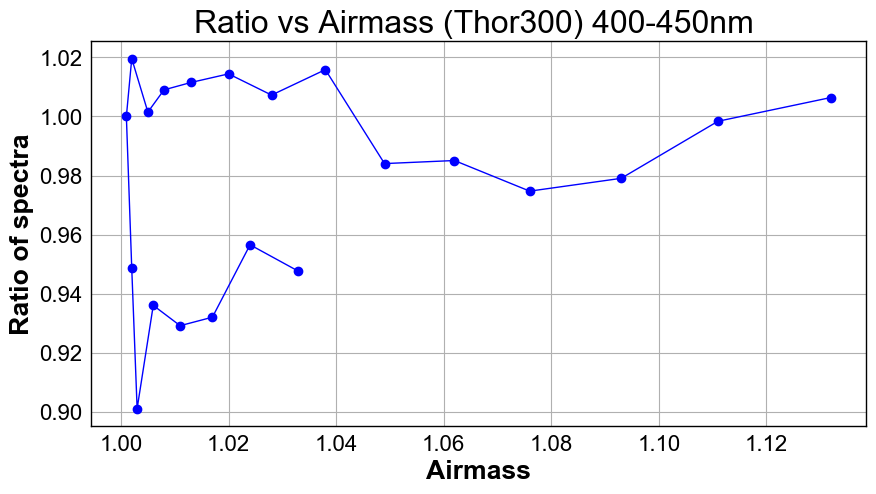

In [51]:
ShowSpectrumRatiovsAirmass(Thor300_ratio_wl,Thor300_ratio,all_am_Thor300,400.,450.,'Ratio vs Airmass (Thor300) 400-450nm ',dir_top_images,'Thor300_ratio_vs_Airmass.pdf')

### Ratio For Ronchi

In [ ]:
#ShowSpectrumRatio(all_wl_Ron400,all_spec_Ron400,bp_Ron400,'Ron400',dir_top_images,'Ron400_ratio.pdf');

In [ ]:
#Ron400_ratio_wl,Ron400_ratio=ComputeSpectrumRatio(all_wl_Ron400,all_spec_Ron400,bp_Ron400)
#ShowSpectrumRatiovsAirmass(Ron400_ratio_wl,Ron400_ratio,all_am_Ron400,400.,450.,'Ratio vs Airmass (Ron400) 400-450 nm',dir_top_images,'Ron400_ratio_vs_Airmass.pdf')

### Ratio for HoloPhP

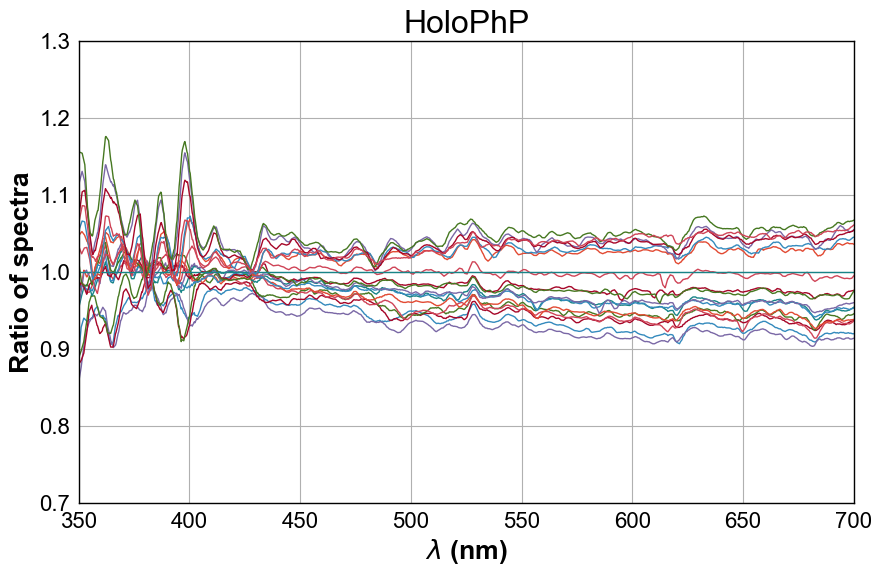

In [52]:
ShowSpectrumRatio(all_wl_HoloPhP,all_spec_HoloPhP,bp_HoloPhP,'HoloPhP',dir_top_images,'HoloPhP_ratio.pdf',YMAX=1.3);

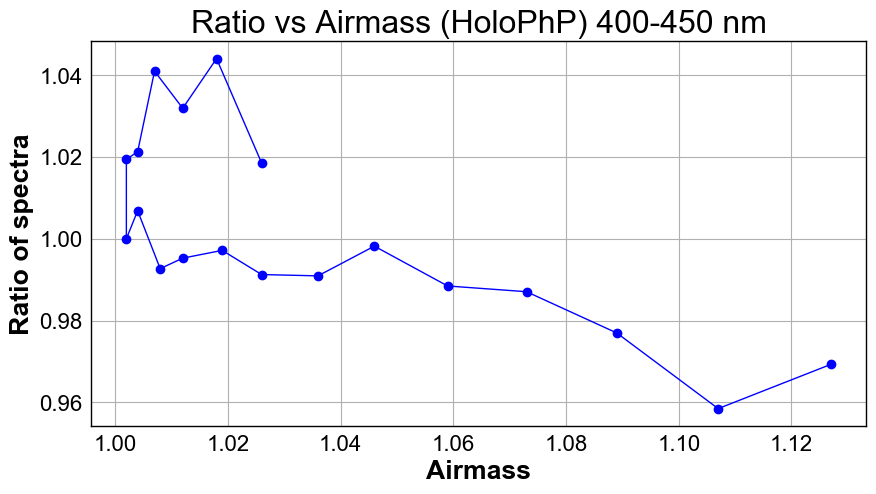

In [53]:
HoloPhP_ratio_wl,HoloPhP_ratio=ComputeSpectrumRatio(all_wl_HoloPhP,all_spec_HoloPhP,bp_HoloPhP)
ShowSpectrumRatiovsAirmass(HoloPhP_ratio_wl,HoloPhP_ratio,all_am_HoloPhP,400.,450.,'Ratio vs Airmass (HoloPhP) 400-450 nm',dir_top_images,'HoloPhP_ratio_vs_Airmass.pdf')

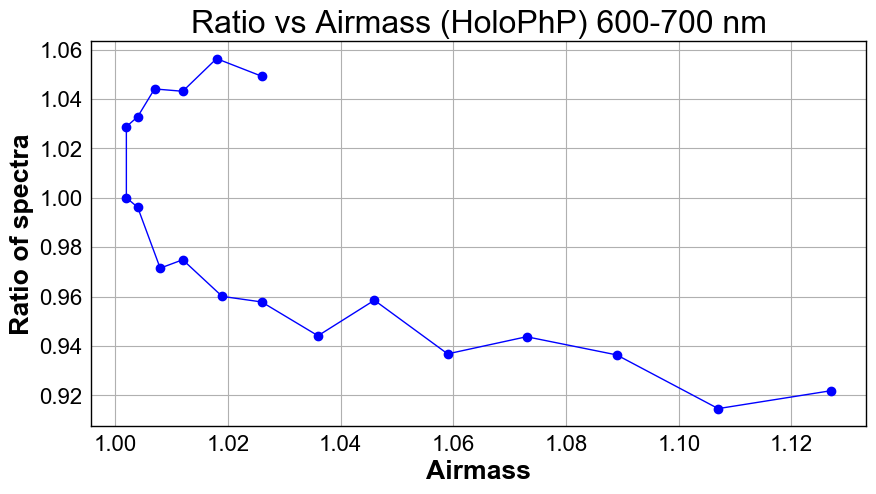

In [54]:
ShowSpectrumRatiovsAirmass(HoloPhP_ratio_wl,HoloPhP_ratio,all_am_HoloPhP,600.,700.,'Ratio vs Airmass (HoloPhP) 600-700 nm',dir_top_images,'HoloPhP_ratio_vs_Airmass_2.pdf')

### Ratio For HoloPhAg

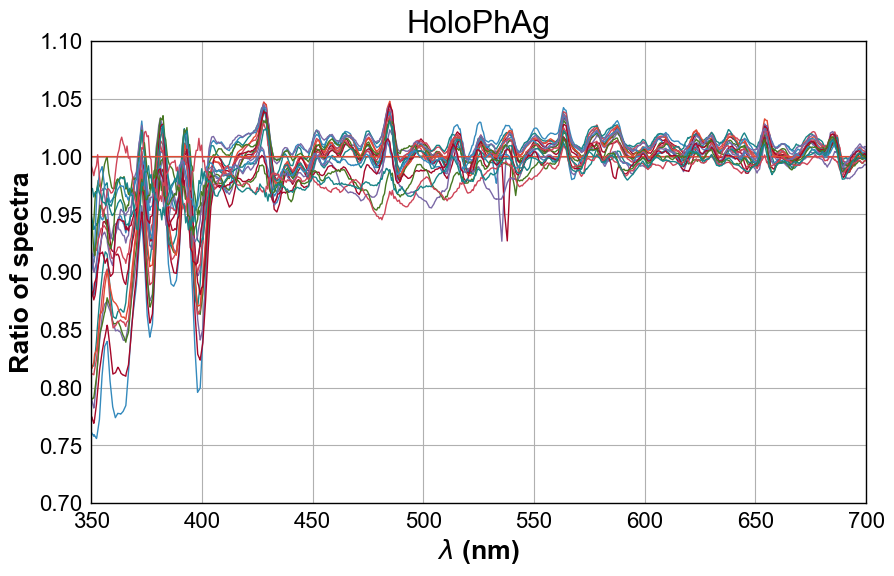

In [55]:
ShowSpectrumRatio(all_wl_HoloPhAg,all_spec_HoloPhAg,bp_HoloPhAg,'HoloPhAg',dir_top_images,'HoloPhAg_ratio.pdf');

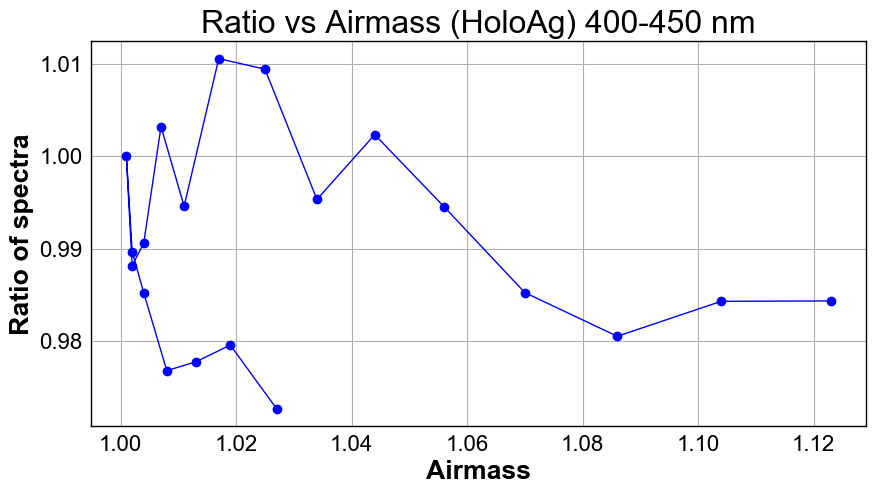

In [56]:
HoloPhAg_ratio_wl,HoloPhAg_ratio=ComputeSpectrumRatio(all_wl_HoloPhAg,all_spec_HoloPhAg,bp_HoloPhAg)
ShowSpectrumRatiovsAirmass(HoloPhAg_ratio_wl,HoloPhAg_ratio,all_am_HoloPhAg,400.,450.,'Ratio vs Airmass (HoloAg) 400-450 nm',dir_top_images,'HoloPhAg_ratio_vs_Airmass.pdf')

### Ratio for HoloAmAg

Warning, 20 of 826 bins contained negative fluxes; they have been set to zero.
Warning, 12 of 828 bins contained negative fluxes; they have been set to zero.
Warning, 6 of 829 bins contained negative fluxes; they have been set to zero.
Warning, 12 of 829 bins contained negative fluxes; they have been set to zero.
Warning, 9 of 830 bins contained negative fluxes; they have been set to zero.
Warning, 8 of 830 bins contained negative fluxes; they have been set to zero.
Warning, 15 of 830 bins contained negative fluxes; they have been set to zero.
Warning, 10 of 830 bins contained negative fluxes; they have been set to zero.
Warning, 5 of 830 bins contained negative fluxes; they have been set to zero.
Warning, 4 of 829 bins contained negative fluxes; they have been set to zero.
Warning, 5 of 830 bins contained negative fluxes; they have been set to zero.
Warning, 5 of 829 bins contained negative fluxes; they have been set to zero.
Warning, 7 of 829 bins contained negative fluxes; they have

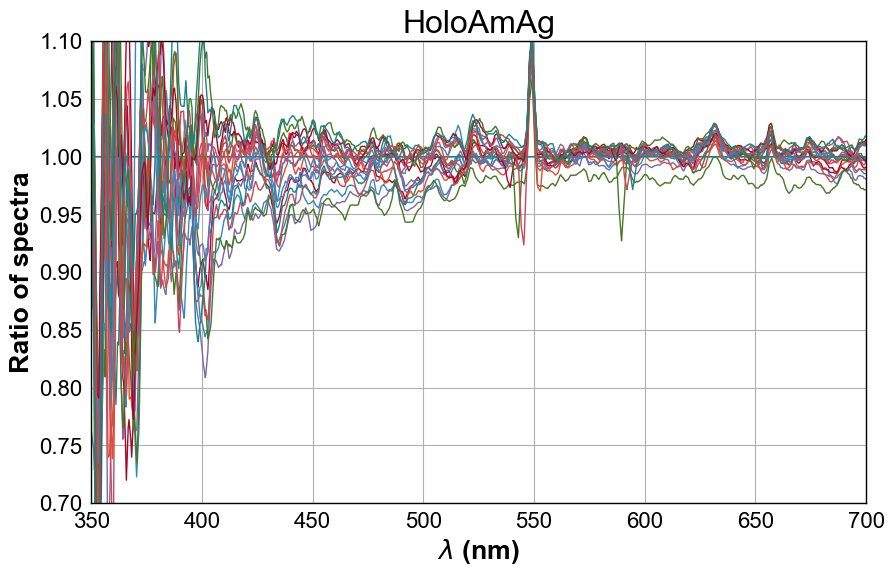

In [57]:
ShowSpectrumRatio(all_wl_HoloAmAg,all_spec_HoloAmAg,bp_HoloAmAg,'HoloAmAg',dir_top_images,'HoloAmAg_ratio.pdf');

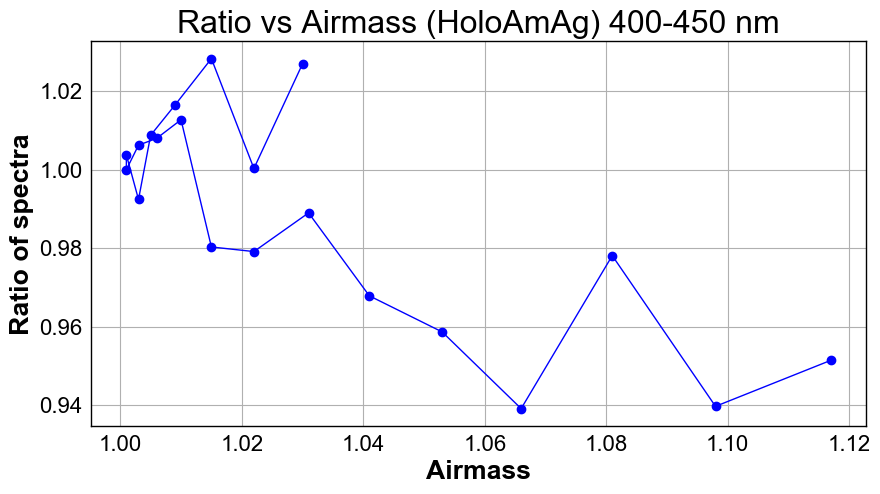

In [58]:
HoloAmAg_ratio_wl,HoloAmAg_ratio=ComputeSpectrumRatio(all_wl_HoloAmAg,all_spec_HoloAmAg,bp_HoloAmAg)
ShowSpectrumRatiovsAirmass(HoloAmAg_ratio_wl,HoloAmAg_ratio,all_am_HoloAmAg,400.,450.,'Ratio vs Airmass (HoloAmAg) 400-450 nm',dir_top_images,'HoloAmAg_ratio_vs_Airmass.pdf')